In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import itertools




In [2]:
h = .02  # step size in the mesh

names = ["Decision Tree", "Random Forest", "Neural Net"]


classifiers = [
    DecisionTreeClassifier(max_depth=10, max_features=None),
    RandomForestClassifier(max_depth=200, n_estimators=200, max_features=None),
    MLPClassifier(alpha=0.1),
    AdaBoostClassifier()
]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
moon=make_moons(noise=0.3, random_state=0)
circle=make_circles(noise=0.2, factor=0.5, random_state=1)

0.0
0.0
0.00369039877839

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


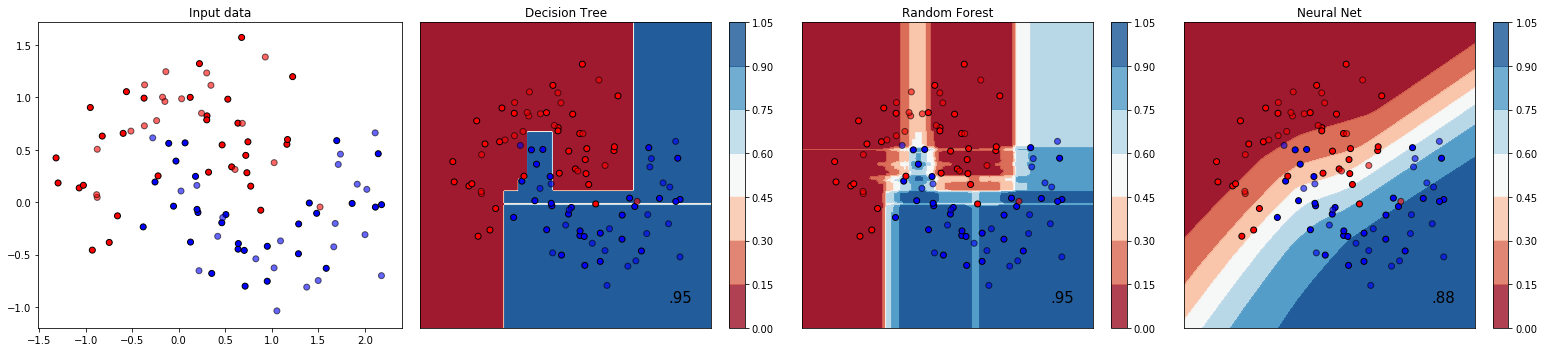

In [3]:
data=circle
data=moon

X,y=data
i=1
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)   
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


a=np.linspace(x_min,x_max,10,endpoint=True)
b=np.linspace(y_min,y_max,10,endpoint=True)
X_empty=np.array(list(itertools.product(a, b)))
y_empty=[-1]*len(X_empty)# 999 represents the virtual class
X_trainx=np.vstack((X_train,X_empty))
y_trainx=list(y_train)+list(y_empty)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
figure = plt.figure(figsize=(27, 5))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, i)
ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')

ax = plt.subplot(2,2,2)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')


ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    print min(Z)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    cntr1 = ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
#     figure.colorbar(cntr1, ax)
    cbar0 = plt.colorbar( cntr1,)


    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
    i += 1
plt.tight_layout()
plt.show()

(64232,) (64232,)
(64232,) (64232,)
(64232,) (64232,)


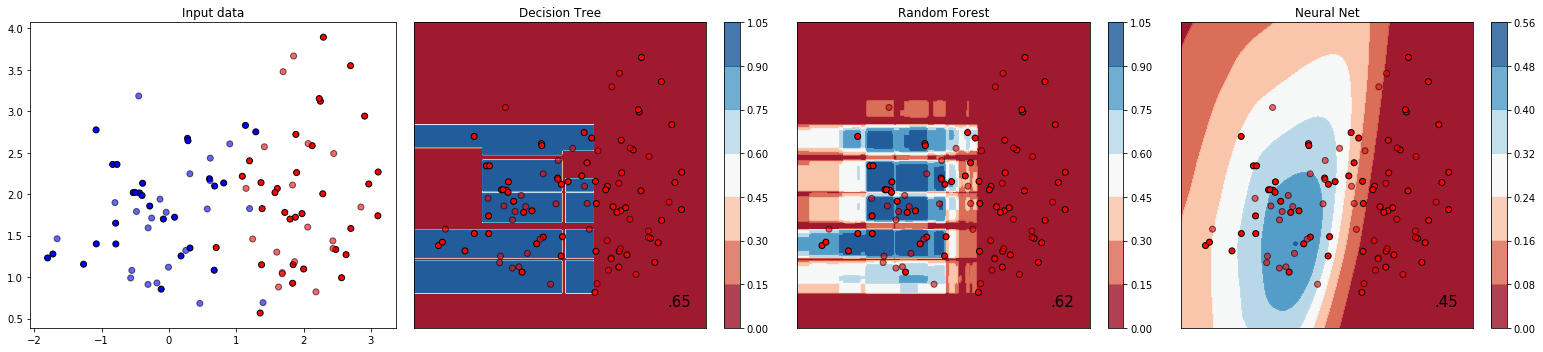

In [4]:
data=linearly_separable
X,y=data
i=1
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)   
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


a=np.linspace(x_min,x_max,10,endpoint=True)
b=np.linspace(y_min,y_max,10,endpoint=True)
X_empty=np.array(list(itertools.product(a, b)))
y_empty=[0]*len(X_empty)# 999 represents the virtual class
X_trainx=np.vstack((X_train,X_empty))
y_trainx=list([1]*len(X_train))+list(y_empty)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
figure = plt.figure(figsize=(27, 5))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, i)
ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')

ax = plt.subplot(2,2,2)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')


ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_trainx, y_trainx)
    score = clf.score(X_test, y_test)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    clf.fit(X_train, y_train)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z2 = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z2 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    print Z.shape,Z2.shape
    Z=Z*Z2
    
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    cntr1 = ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
#     figure.colorbar(cntr1, ax)
    cbar0 = plt.colorbar( cntr1,)


    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=[1]*len(X_train), cmap=cm_bright,
                   edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=[1]*len(X_test), cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
    i += 1
plt.tight_layout()
plt.show()

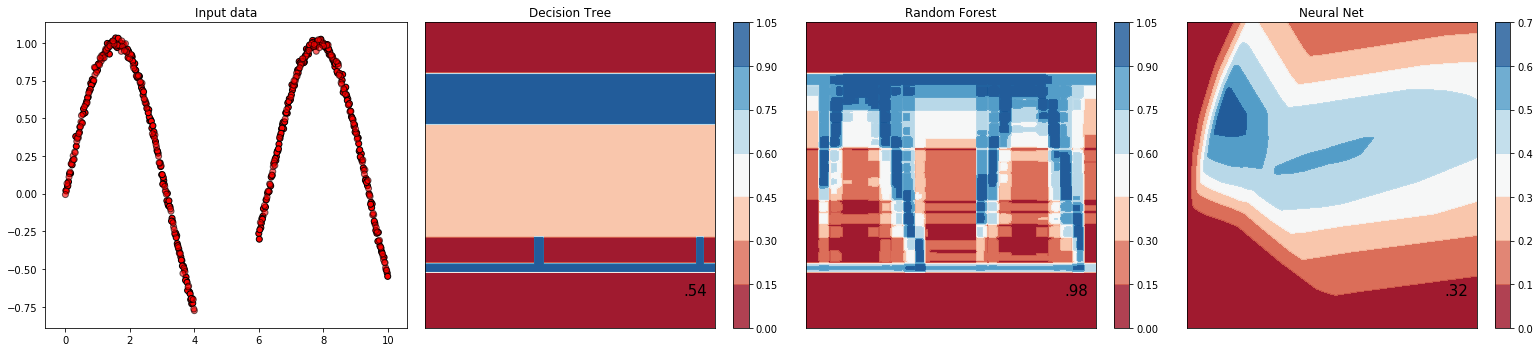

In [5]:
import math
x11=np.linspace(0, 4, num=250)
x12=np.linspace(6, 10, num=250)
x1=np.concatenate((x11, x12), axis=0)
x2=map(lambda x:np.sin(x)+np.random.normal(0,0.02),x1 )
X=np.array([x1,x2]).T
y=[1]*len(x1)# 999 represents the virtual class

i=1
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)   
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


a=np.linspace(x_min,x_max,25,endpoint=True)
b=np.linspace(y_min,y_max,25,endpoint=True)
X_empty=np.array(list(itertools.product(a, b)))
y_empty=[0]*len(X_empty)# 999 represents the virtual class
X_trainx=np.vstack((X_train,X_empty))
y_trainx=list([1]*len(X_train))+list(y_empty)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
figure = plt.figure(figsize=(27, 5))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, i)
ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')

ax = plt.subplot(2,2,2)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')


ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_trainx, y_trainx)
    score = clf.score(X_test, y_test)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
#     Z=Z>0.85
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    cntr1 = ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
#     figure.colorbar(cntr1, ax)
    cbar0 = plt.colorbar( cntr1,)


    # Plot also the training points
#     ax.scatter(X_train[:, 0], X_train[:, 1], c=[1]*len(X_train), cmap=cm_bright,
#                    edgecolors='k')
#     # and testing points
#     ax.scatter(X_test[:, 0], X_test[:, 1], c=[1]*len(X_test), cmap=cm_bright,
#                    edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
    i += 1
plt.tight_layout()
plt.show()


1. 为什么选择 tree based ， 因为这样就不用采样，在高纬度空间，采样个数 指数上升，而且，数据非常稀疏
2. 目标： 分割dense data and sparse data。 
    * 如果数据均匀分布在$x\in[0,10]$, 结果就是该特征上很难split,整个特征上算dense的,也就是 绝对安全的
    * 倾向于分割有空隔的dimension
    



2. 带来的问题：
    * 对于高纬度，很难做到对所有维度的分割。比如每个feature 2split， 那么2^d的分割，量非常巨大，遗漏的数据也很多。 
        * ps 每个遗漏的数据，在其他维度可能是属于high density 啊，如果model 恰好以靠那些维度决定的，那么unfair 认为model uncertain
        * 高密度的数据 feature,可能完全没用
        
    * 但是 很多模型是在全维度上建模的呀

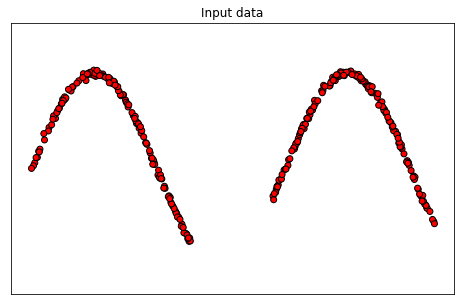

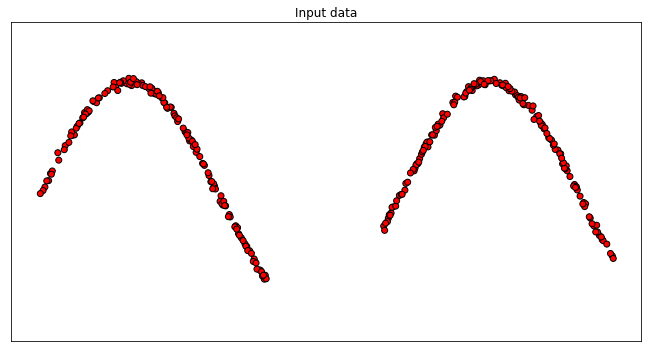

In [7]:
x1=np.linspace(0, 4, num=250)
x2=map(lambda x:2*x+np.random.normal(0,0.02),x1 )

figure = plt.figure(figsize=(27, 5))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, 3, 1)
ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')


ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
plt.tight_layout()
plt.show()
